<a href="https://colab.research.google.com/github/thual/PBLClimate/blob/main/CorrectionPCAinR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal component anaysis in $\mathbb R^3$
## Olivier THUAL, Toulouse INP, 08/02/2023

Correction of Question 3







# Question 3

**Question 3.** Write a similar program in $\mathbb R^3$. One can choose
$$\underline{\phi}_1= {1\over \sqrt 2} \left( \begin{matrix} 1\cr 1\cr 0 \end{matrix} \right),\; \underline{\phi}_2= {1\over \sqrt 2} \left( \begin{matrix} 1\cr -1\cr 0 \end{matrix} \right)\quad \hbox{and} \quad \underline{\phi}_3= \left( \begin{matrix} 0\cr 0\cr 1 \end{matrix} \right), $$
or any other choice of orthormal basis. The choice of three positive values $(a_1, a_2, a_3)$ is arbitray. 

**Answer 3.**

See and run program below!

# Correction of Question 3



In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
print("PAC in R3")


def expe3(r):
    # Experiment for PCA in R3

    # Random amplitudes
    u1=a1*np.random.normal(0,1,N).reshape(1,N)
    u2=a2*np.random.normal(0,1,N).reshape(1,N)
    u3=a3*np.random.normal(0,1,N).reshape(1,N)
    
    # Cloud of points
    Xmean=np.array([xmean,ymean,zmean]).reshape(3,1)
    X=Xmean+phi1@u1+phi2@u2+phi3@u3
    
    # Init figure
    fig = plt.figure(1,figsize=(15,15))
    ax = plt.axes(projection="3d")

    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.minorticks_on()
    plt.grid(which='minor',color='grey', axis='x', linestyle=':', linewidth=1)        
    plt.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)        
    plt.title("Cloud of points N="+str(N),fontsize=16)
    plt.xlabel("x",fontsize=16); plt.ylabel("y",fontsize=16); plt.ylabel("z",fontsize=16)

    
    # Plot the cloud of points
    ax.scatter3D(X[0,:],X[1,:],X[2,:],marker='o',color='black',s=1)
    ax.scatter3D(Xmean[0],Xmean[1],Xmean[2],marker='o',color='magenta',s=50)

    # Plot the principal directions
    #ax.axis('equal')

    ax.quiver(xmean,ymean,zmean,p*a1*phi1[0],p*a1*phi1[1],p*a1*phi1[2],color='r',length=le)
    ax.quiver(xmean,ymean,zmean,p*a2*phi2[0],p*a2*phi2[1],p*a2*phi2[2],color='g',length=le)
    ax.quiver(xmean,ymean,zmean,p*a3*phi3[0],p*a3*phi3[1],p*a3*phi3[2],color='b',length=le)

    ax.quiver(xmean,ymean,zmean,-p*a1*phi1[0],-p*a1*phi1[1],-p*a1*phi1[2],color='r',length=le)
    ax.quiver(xmean,ymean,zmean,-p*a2*phi2[0],-p*a2*phi2[1],-p*a2*phi2[2],color='g',length=le)
    ax.quiver(xmean,ymean,zmean,-p*a3*phi3[0],-p*a3*phi3[1],-p*a3*phi3[2],color='b',length=le)   

    ax.set_xlim(xmin,xmax); ax.set_ylim(ymin,ymax); ax.set_zlim(zmin,zmax) 
       
    ## Find the eigenvectors and eigenvalues back
    
    # Estimation of the mean
    eXmean=np.mean(X,axis=1).reshape(3,1)
    ax.scatter3D(eXmean[0],eXmean[1],eXmean[2],marker='s',color='cyan',s=50)
    #err=np.linalg.norm(eXmean-Xmean)/np.linalg.norm(Xmean)
    #print("N=",N,", Mean estimation of X=",eXmean,", Error=",err)
    
    # Principal Component analysis
    Xtil=X-eXmean
    matA=Xtil@Xtil.transpose()/(N-1)
    val, vect = np.linalg.eig(matA)
    j1=np.argmax(val);j2=np.argmin(val)
    
    
    ea1=np.sqrt(val[0]); ea2=np.sqrt(val[1]); ea3=np.sqrt(val[2]);
    
    ephi1=vect[:,0]; ephi2=vect[:,1]; ephi3=vect[:,2]

    
    # Principal directions
    ax.quiver(xmean,ymean,zmean,p*ea1*ephi1[0],p*ea1*ephi1[1],p*ea1*ephi1[2],color='m',length=le)
    ax.quiver(xmean,ymean,zmean,p*ea2*ephi2[0],p*ea2*ephi2[1],p*ea2*ephi2[2],color='y',length=le)
    ax.quiver(xmean,ymean,zmean,p*ea3*ephi3[0],p*ea3*ephi3[1],p*ea3*ephi3[2],color='c',length=le)
   
    ax.quiver(xmean,ymean,zmean,-p*ea1*ephi1[0],-p*ea1*ephi1[1],-p*ea1*ephi1[2],color='m',length=le)
    ax.quiver(xmean,ymean,zmean,-p*ea2*ephi2[0],-p*ea2*ephi2[1],-p*ea2*ephi2[2],color='y',length=le)
    ax.quiver(xmean,ymean,zmean,-p*ea3*ephi3[0],-p*ea3*ephi3[1],-p*ea3*ephi3[2],color='c',length=le)      

    plt.savefig("R2PCA"+str(r)+".png")
    plt.show()

PAC in R3


# Parameters to change

The following parameters can be changed:

*  `N` : Number of points of the cloud
*  `R` : Number of experiments
*  `xmean, ymean, zmean` : Coordinate of $\underline X_{m}$
*  `a1, a2, a3` : Root mean square of the gaussian random variable $u_1$, $u_2$ and $u_3$ 
*  `phi1, phi2, phi2` : Vectors $\underline{\phi_1}$, $\underline{\phi_2}$ and $\underline{\phi_3}$



Experiment r= 0


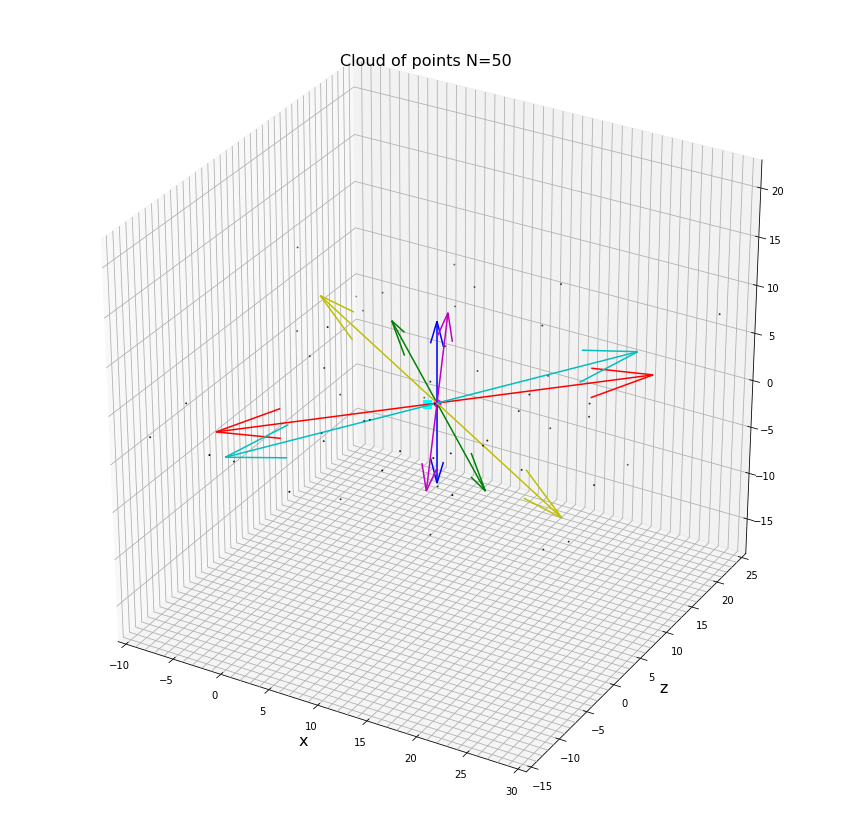

Experiment r= 1


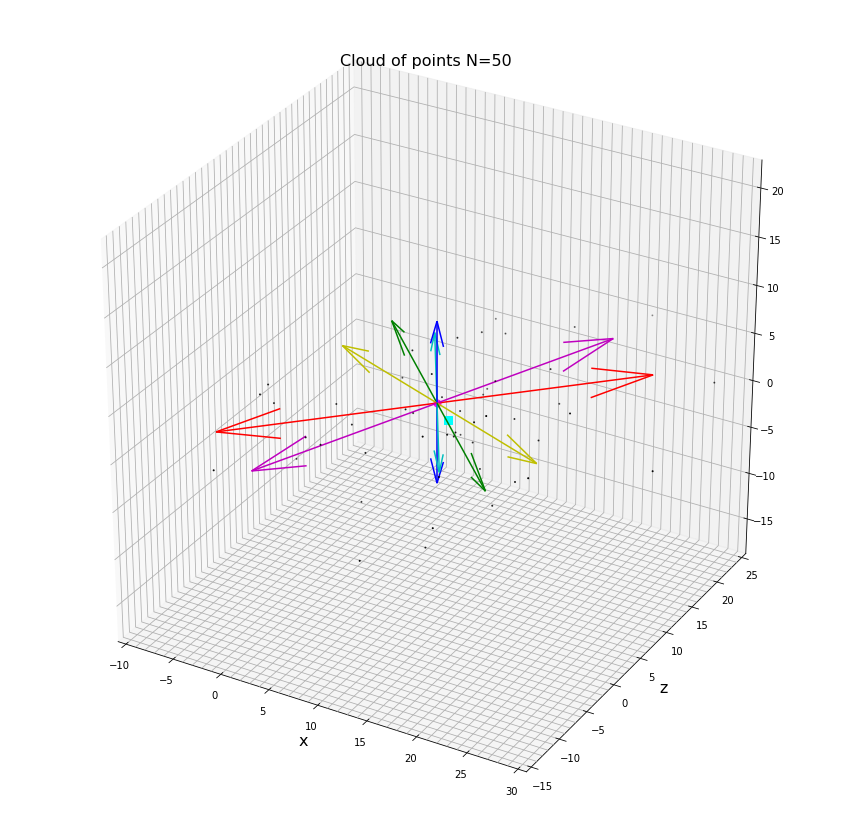

Experiment r= 2


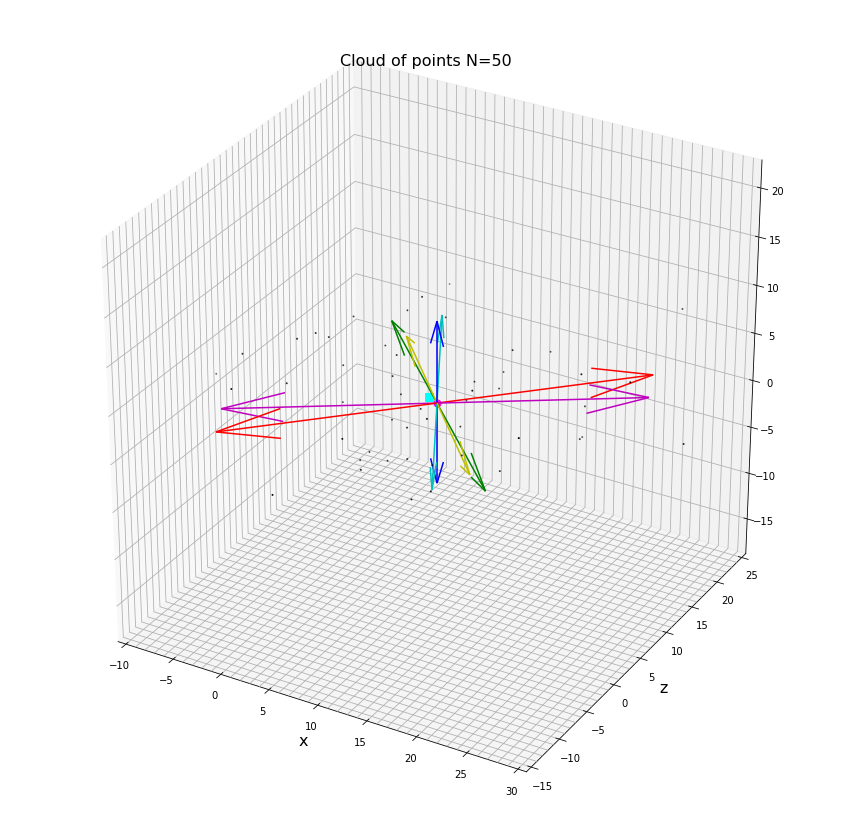

Experiment r= 3


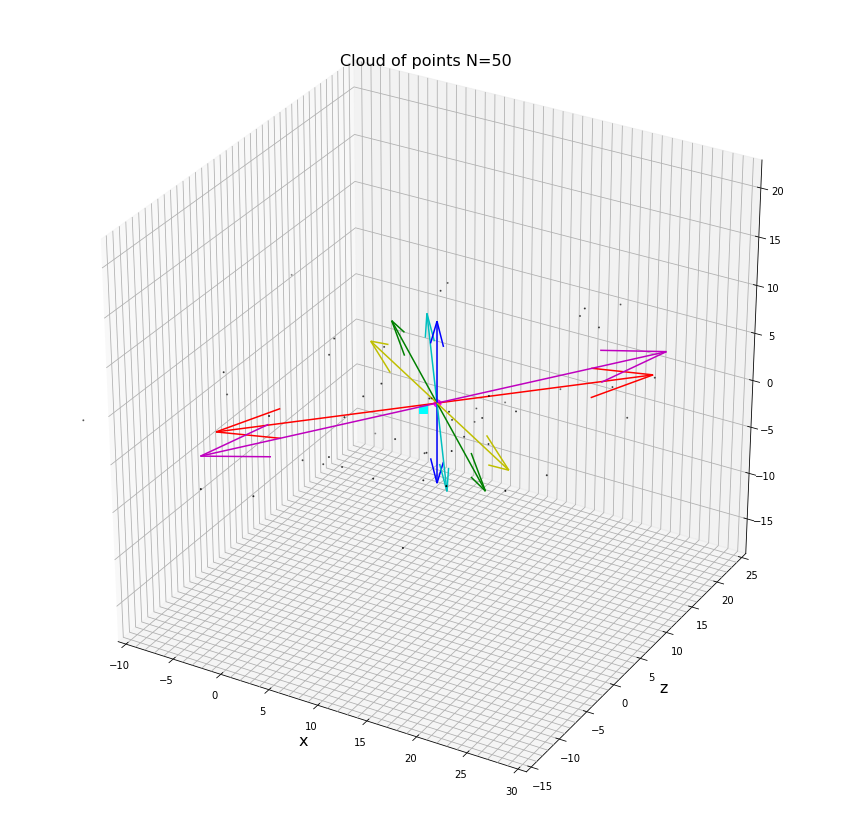

In [ ]:
# Parameters that can be changed R3
N=50 # Number of samples for the cloud
R=4 # Number of experiments
xmean=10; ymean=5; zmean=2; # Coordinates of the mean
a1=10; a2=8; a3=6 # Root mean square in the orthogonal directions
# Principal directions
phi1=np.array([1,1,0]).reshape(3,1)/np.sqrt(2)
phi2=np.array([1,-1,0]).reshape(3,1)/np.sqrt(2)
phi3=np.array([0,0,1]).reshape(3,1)/np.sqrt(2)

# Derived parameters
p=.4 # Scale for the vectors
le=5 # Lenth for the vectors
L=2*a1; L2=2*a2; L3=2*a3; # Lenth for the plot limits
xmin=np.round(xmean-L,10); # Plot limits
xmax=np.round(xmean+L,10); # Plot limits
ymin=np.round(ymean-L,10); # Plot limits
ymax=np.round(ymean+L,10); # Plot limits
zmin=np.round(zmean-L,10); # Plot limits
zmax=np.round(zmean+L,10); # Plot limits

# Loop on the experiments
for r in range(0,R):
    print("Experiment r=",r)
    expe3(r)
